In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import os
import glob

folder_path = '/content/drive/MyDrive/AUP_project/AUPs/'
files = glob.glob(os.path.join(folder_path, '*.txt'))

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())

detected_encoding = result['encoding']

text_data = []

for file_path in files:
    with open(file_path, 'r', encoding=detected_encoding) as f:
        text = f.read()
        text_data.append(text)

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    word_tokens = word_tokenize(text)
    filtered_text = [lemmatizer.lemmatize(w) for w in word_tokens if w not in stop_words and w.isalpha()]
    return filtered_text

# Preprocess all the documents
text_data = [preprocess_text(doc) for doc in text_data]

NameError: ignored

In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import Phrases

# bigram model
bigram = Phrases(text_data, min_count=5, threshold=100)

# trigram model
trigram = Phrases(bigram[text_data], threshold=100)

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram[bigram[doc]] for doc in texts]

text_data = make_bigrams(text_data)
text_data = make_trigrams(text_data)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join back the tokenized words
text_data_joined = [' '.join(doc) for doc in text_data]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data_joined)


In [ ]:
from sklearn.decomposition import NMF

n_topics = 10
nmf = NMF(n_components=n_topics, random_state=1)
nmf.fit(X)

def get_top_words(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topics.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return topics

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
topic_words = get_top_words(nmf, tf_feature_names, n_top_words)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
import nltk

def contains_topic_word(sentence, topic_words):
    words = word_tokenize(sentence.lower())
    return any(word in topic_words for word in words)

# Join the tokenized words back into sentences
text_data_joined = [' '.join(doc) for doc in text_data]

for i, words in enumerate(topic_words):
    topic_sentences = [sentence for document in text_data_joined for sentence in nltk.sent_tokenize(document) if contains_topic_word(sentence, words)]
    print(f"Topic #{i}:")
    print(topic_sentences[:1])


Topic #0:
['acceptable use policy acceptable use policy last_updated september acknowledgement acceptance aup use continued use service made available decisive service agree bound term condition acceptable use policy aup agree term aup use service capitalized term used aup meaning given customer reseller agreement decisive inquiry regarding aup directed legal modification acceptable use policy decisive reserve right time without notice change term condition aup therefore encouraged regularly check update aup conduct may use decisive network service engage foster promote illegal abusive irresponsible behaviour including use internet account computer without owner authorization unauthorized access use data system network including attempt probe_scan test_vulnerability system network breach security authentication_measure without express authorization owner system network collecting using email address screen name identifier without consent person identified including without limitation p

In [ ]:
disallowed_indicator_words = ["not", "prohibit", "ban", "disallow", "forbid"]

def contains_disallowed_indicator_word(sentence):
    words = word_tokenize(sentence.lower())
    return any(word in disallowed_indicator_words for word in words)

disallowed_sentences = [sentence for document in text_data_joined for sentence in nltk.sent_tokenize(document) if contains_disallowed_indicator_word(sentence)]

print(disallowed_sentences[:5])


['acceptable use policy acceptable use policy last_updated september acknowledgement acceptance aup use continued use service made available decisive service agree bound term condition acceptable use policy aup agree term aup use service capitalized term used aup meaning given customer reseller agreement decisive inquiry regarding aup directed legal modification acceptable use policy decisive reserve right time without notice change term condition aup therefore encouraged regularly check update aup conduct may use decisive network service engage foster promote illegal abusive irresponsible behaviour including use internet account computer without owner authorization unauthorized access use data system network including attempt probe_scan test_vulnerability system network breach security authentication_measure without express authorization owner system network collecting using email address screen name identifier without consent person identified including without limitation phishing in

In [ ]:
# process before training NMF
disallowed_sentences = [sentence for document in text_data_joined for sentence in nltk.sent_tokenize(document) if contains_disallowed_indicator_word(sentence)]

# train the NMF model on these sentences only
vectorizer = TfidfVectorizer()
X_disallowed = vectorizer.fit_transform(disallowed_sentences)

nmf_disallowed = NMF(n_components=n_topics, random_state=1)
nmf_disallowed.fit(X_disallowed)

tf_feature_names_disallowed = vectorizer.get_feature_names_out()
topic_words_disallowed = get_top_words(nmf_disallowed, tf_feature_names_disallowed, n_top_words)

topic_words_disallowed

[['service',
  'use',
  'may',
  'policy',
  'usage',
  'right',
  'account',
  'network',
  'without',
  'limited'],
 ['service',
  'use',
  'may',
  'policy',
  'activity',
  'network',
  'user',
  'including',
  'account',
  'email'],
 ['comcast',
  'service',
  'policy',
  'xfinity',
  'network',
  'internet',
  'customer',
  'http',
  'device',
  'us'],
 ['decisive',
  'service',
  'use',
  'may',
  'system',
  'aup',
  'consent',
  'network',
  'information',
  'without'],
 ['dwp',
  'device',
  'policy',
  'personal',
  'use',
  'must',
  'social_medium',
  'equipment',
  'access',
  'user'],
 ['mediacom',
  'internet',
  'service',
  'gb',
  'fee',
  'customer',
  'additional_monthly_usage',
  'monthly_usage_allowance',
  'bandwidth',
  'policy'],
 ['host',
  'violation',
  'customer',
  'aup',
  'pagely',
  'service',
  'resolution',
  'server',
  'email',
  'dedicated'],
 ['site',
  'interactive',
  'term',
  'contribution',
  'disk_space',
  'apply',
  'carry',
  'agree',
  

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=100,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(X)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % (topic_idx+1)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)


Topic #1: service use site policy may interactive content acceptable user material
Topic #2: dell race role controversial campus factor worm vandalizing technological involves
Topic #3: helping employer viewssecurity allows exclude anonymization allocation testimonial unreasonable contentfulterms
Topic #4: price recycle responsibility developed relative decisive create landline trackerreceipt kosovoreunionromaniarussiarwandasaint
Topic #5: response assigned circulation wwt introduction falsehood vexatious displaying plus eastern
Topic #6: service api forfeiture nexus insider use vigilant zapier flash account
Topic #7: service use site account stack content policy material suspended may
Topic #8: service nine use policy customer zone page per create pas
Topic #9: university service luciasaint newsgroup authorizing measuring automatic belongs whatever drive
Topic #10: administration absence look department court candidate easy hassra loan harmless


In [ ]:
from sklearn.cluster import KMeans

n_clusters = 10
km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(n_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()


Cluster 0: dwp moj syops system device shall use personal user security
Cluster 1: service use policy may content user customer account information zoom
Cluster 2: site use interactive service policy breach contribution may material standard
Cluster 3: greengeeks client hosting matter service company use netherlands account server
Cluster 4: modx host violation service customer aup pagely email dedicated resolution
Cluster 5: dell resource user aup violates violation including access law sole
Cluster 6: service wwt spot posit department user use kahoot content llc
Cluster 7: decisive socketlabs email recipient service consent use system aup address
Cluster 8: wise service payment sale merchant transaction business moto canada product
Cluster 9: university information google apps data resource rutgers use student security


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


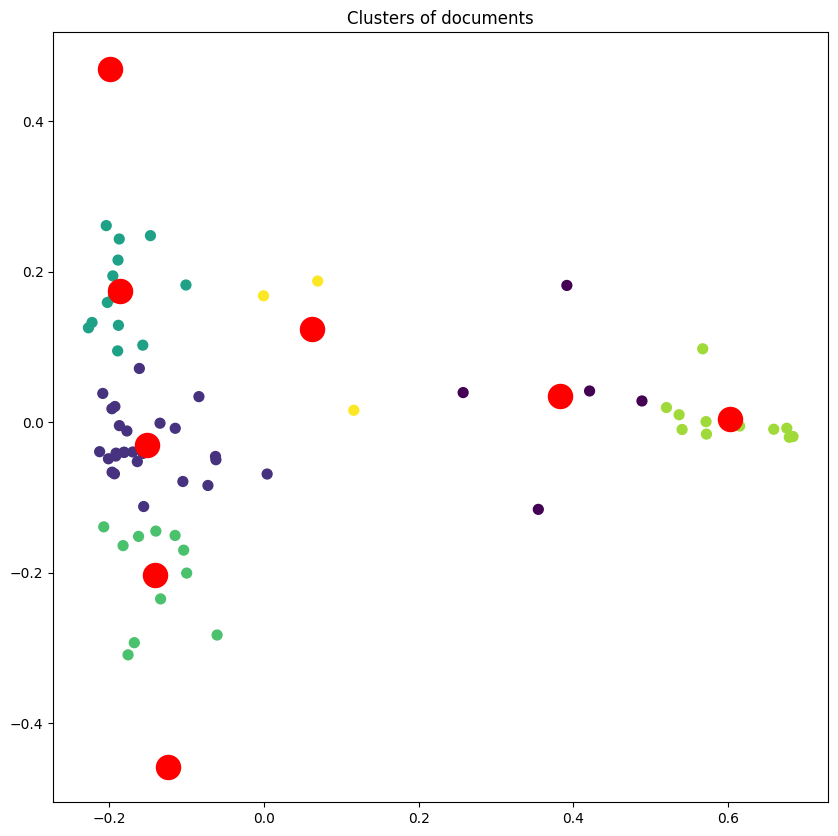

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2).fit(X.toarray())
data2D = pca.transform(X.toarray())

km = KMeans(n_clusters=num_clusters).fit(data2D)
clusters = km.labels_.tolist()

# Plotting the cluster obtained using k means
plt.figure(figsize=(10, 10))
scatter = plt.scatter(data2D[:, 0], data2D[:, 1], c=km.labels_, s=50, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clusters of documents')
plt.show()

In [ ]:
import requests
import pandas as pd
import re

def get_sector_prediction(url):
    prompt = f"Requirement: Please state the sector in the first word of your response. Question: Based on the URL '{url}', what would be the most likely sector for this business?"

    response = requests.post(
        'https://api.openai.com/v1/completions',
        headers={
            'Content-Type': 'application/json',
            'Authorization': f'Bearer',
        },
        json={
            'model': 'text-davinci-003',
            'prompt': prompt,
            'max_tokens': 100,
            'temperature': 0.5,
        },
    )
    response_json = response.json()

    try:
        # Extract the first word from the response
        first_word = response_json['choices'][0]['text'].split()[0]
        return first_word
    except KeyError:
        print(response_json)  # If there's an error, print the response
        return None

def extract_sector_from_response(response):
    sectors = ['Technology', 'Telecommunications', 'Healthcare', 'Finance', 'Education', 'Government', 'Retail', 'Entertainment']
    detected_sectors = []

    for sector in sectors:
        if sector.lower() in response.lower():
            detected_sectors.append(sector)

    if not detected_sectors:
        detected_sectors.append('Other')

    return detected_sectors[0]


# Load your CSV
df = pd.read_csv('/content/drive/MyDrive/AUP_project/master_219.csv')

sectors = []
# Apply sector prediction for each URL
for url in df['url']:
    sector = get_sector_prediction(url)
    sectors.append(sector)
    print(f'URL: {url}, Predicted Sectors: {sector}')

URL: https://postmaster.t-online.de/aup.en.html, Predicted Sectors: Telecommunications
URL: https://trust.kahoot.com/acceptable-use-policy/, Predicted Sectors: Technology
URL: https://aws.amazon.com/aup/, Predicted Sectors: Technology
URL: https://stackoverflow.com/legal/acceptable-use-policy, Predicted Sectors: Technology
URL: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1137343/dwp-acceptable-use-policy-version-3.pdf, Predicted Sectors: Government
URL: https://explore.zoom.us/en/trust/zoom-phone-acceptable-use-policy/, Predicted Sectors: Technology
URL: https://www.slideshare.net/gfair3/acceptable-use-policy-18802628, Predicted Sectors: Technology
URL: https://help.nexusmods.com/article/114-api-acceptable-use-policy, Predicted Sectors: Technology
URL: https://learn.microsoft.com/en-us/legal/intune/acceptable-use-policy-for-microsoft-intune, Predicted Sectors: Technology
URL: https://www.figma.com/aup/, Predicted Sectors: Technology
U

KeyboardInterrupt: ignored

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.8 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd
import os
from nltk.tokenize import sent_tokenize
import chardet

def truncate_text(text, max_length):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    truncated_text = ""
    for sentence in sentences:
        if len(truncated_text + sentence) <= max_length:
            truncated_text += sentence
        else:
            break
    return truncated_text

# Set API key

directory = '/content/drive/MyDrive/AUP_project/AUPs/'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
detected_encoding = result['encoding']

# Loop over all text files in the directory
for filename in os.listdir(directory):
    if filename in df['TextFile'].values:
        continue
    if filename.endswith(".txt"):
        with open(os.path.join(directory, filename), 'r', encoding=detected_encoding, errors='ignore') as f:
            text = f.read()

        # Truncate the text to fit within the model's token limit (approximately 2048 tokens)
        truncated_text = truncate_text(text, 2048)

        # Define the prompt
                # Define the prompt
        prompt = f"please identify every action that the website disallows users to do in the following acceptable user policy and give that action a category label (one to three words that briefly summarize the disallowed action). Please format your answer strictly in a CSV format where the two columns are: 'Disallowed Actions' and 'Label'.\n\n{truncated_text}"

        # Send the request to the GPT-3 model
        response = requests.post(
            'https://api.openai.com/v1/completions',
            headers={
                'Content-Type': 'application/json',
                'Authorization': f'Bearer {api_key}',
            },
            json={
                'model': 'text-davinci-003',
                'prompt': prompt,
                'max_tokens': 2048,
                'temperature': 0.5,
            },
        )

        # Parse the response
        response_data = response.json()['choices'][0]['text'].strip().split('\n')

        # Identify the start of the disallowed actions and labels
        start_index = response_data.index('Disallowed Actions,Label') + 1

        # Parse the disallowed actions and labels
        for row in response_data[start_index:]:
            if ',' in row:  # Only process rows that contain a comma
                disallowed_action, label = row.split(',', 1)  # Split on the first comma only
                df = df.append({"TextFile": filename, "Disallowed Action": disallowed_action.strip(), "Label": label.strip()}, ignore_index=True)
# Save the dataframe to a CSV file
df.to_csv('output.csv', index=False)

<ipython-input-58-8738bed85668>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"TextFile": filename, "Disallowed Action": disallowed_action.strip(), "Label": label.strip()}, ignore_index=True)
<ipython-input-58-8738bed85668>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"TextFile": filename, "Disallowed Action": disallowed_action.strip(), "Label": label.strip()}, ignore_index=True)
<ipython-input-58-8738bed85668>:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"TextFile": filename, "Disallowed Action": disallowed_action.strip(), "Label": label.strip()}, ignore_index=True)
<ipython-input-58-8738bed85668>:67: FutureWarning: The frame.append method is deprecated and will

In [ ]:
df.to_csv('/content/drive/MyDrive/AUP_project/Raw_Disallows.csv', index=False)

In [ ]:
df

,TextFile,Disallowed Action,Label
0,199-current.txt,Violate applicable law,Violate law
1,6215-current.txt,copying,Distributing
2,6215-current.txt,non-automated “scraping”,Scraping
3,6215-current.txt,automated system,Robots
4,6215-current.txt,transmitting spam,Spam
...,...,...,...
1170,163-2023.txt,Offensive Content,Offensive
1171,163-2023.txt,Harmful Content,Harmful
1172,48-2023.txt,Illegal or damaging actions,Illegal Actions
1173,48-2023.txt,Compromise of network systems,Network Compromise


In [ ]:
import numpy as np

np.unique(np.array(df.Label))

array(['About', 'Abuse', 'Abuse of Resources', 'Abusive',
       'Abusive Behavior', 'Abusive Content', 'Acceptable Use Policy',
       'Account Trading', 'Adult Content', 'Adult Services',
       'Advertising', 'Alcohol Business', 'Alcohol Businesses',
       'All Exams', 'Annoyance', 'Anonymous Proxies',
       'App, or Site with any engine, software, tool, agent, device, or mechanism other than the software and/or search agents provided by DAT,Unauthorized Access',
       'Artificial Traffic', 'Authentication', 'Auto-dialing',
       'Automated process', 'Bestiality', 'Blog', 'Blogging', 'Breach',
       'Breach Law', 'Breach law', 'Breach of Terms',
       'Breach of confidentiality', 'Breaching Law', 'Breaching law',
       'Bullying', 'Business Promotion', 'Bypassing', 'Cancel Services',
       'Careers', 'Chargeback', 'Chat Server', 'Child Abuse',
       'Child Erotica', 'Child Pornography', 'Child exploitation',
       'Circumvent Authentication', 'Code tampering',
       'Comm

In [ ]:
np.unique(np.array(df.TextFile))

array(['0014-current.txt', '004-current.txt', '0043-current.txt',
       '013-current.txt', '017-current.txt', '022-current.txt',
       '026-current.txt', '045-current.txt', '057-current.txt',
       '0585-current.txt', '060-current.txt', '064-current.txt',
       '077-current.txt', '097-current.txt', '107-current.txt',
       '1145-current.txt', '116-current.txt', '127-current.txt',
       '1296-current.txt', '1350-current.txt', '144-current.txt',
       '146-current.txt', '152-current.txt', '165-current.txt',
       '1657-current.txt', '1710-current.txt', '178-current.txt',
       '185-current.txt', '197-current.txt', '199-current.txt',
       '2060-current.txt', '2111-current.txt', '221-current.txt',
       '2661-current.txt', '3041-current.txt', '3839-current.txt',
       '6215-current.txt', '6688-current.txt', '7289-current.txt',
       '7705-current.txt', '8643-current.txt', '9139-current.txt',
       '9999-current.txt'], dtype=object)

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
label_to_category = {
    # Abuse and Harassment
    'Abuse': 'Abuse and Harassment',
    'Abuse of Resources': 'Abuse and Harassment',
    'Abusive': 'Abuse and Harassment',
    'Abusive Behavior': 'Abuse and Harassment',
    'Abusive Content': 'Abuse and Harassment',
    'Bullying': 'Abuse and Harassment',
    'Harassing': 'Abuse and Harassment',
    'Harassing Content': 'Abuse and Harassment',
    'Harassment': 'Abuse and Harassment',
    'Harassment/Bullying': 'Abuse and Harassment',
    'Harassment/Intimidation': 'Abuse and Harassment',
    'Hate': 'Abuse and Harassment',
    'Hate Speech': 'Abuse and Harassment',
    'Hateful': 'Abuse and Harassment',
    'Hateful content': 'Abuse and Harassment',
    # And so on...

    # Illegal Activities
    'Illegal': 'Illegal Activities',
    'Illegal Actions': 'Illegal Activities',
    'Illegal Activities': 'Illegal Activities',
    'Illegal Activity': 'Illegal Activities',
    'Illegal Content': 'Illegal Activities',
    'Illegal Domain Names': 'Illegal Activities',
    'Illegal Use': 'Illegal Activities',
    'Illegal activities': 'Illegal Activities',
    'Illegal activity': 'Illegal Activities',
    'Illegal behavior': 'Illegal Activities',
    'Illegal content': 'Illegal Activities',
    'Illegal material': 'Illegal Activities',
    'Illegal/Fraudulent': 'Illegal Activities',
    'Illegal/Fraud': 'Illegal Activities',
    'Law violation': 'Illegal Activities',
    'Law-breaking': 'Illegal Activities',
    'Lawbreaking': 'Illegal Activities',

    # Content Issues
    'Adult Content': 'Content Issues',
    'Adult Services': 'Content Issues',
    'Content Removal': 'Content Issues',
    'Content Standards': 'Content Issues',
    # Continue with other labels for this category...

    # Fraudulent Activities
    'Fraud': 'Fraudulent Activities',
    'Fraudulent': 'Fraudulent Activities',
    'Fraudulent Activities': 'Fraudulent Activities',
    'Fraudulent Interaction': 'Fraudulent Activities',
    # Continue with other labels for this category...

    # add other categories
}

df['New_Label'] = df['Label'].map(label_to_category)

# Check for any labels that were not included in the label_to_category dictionary
# assign a new_label value of NaN
missing_labels = df['Label'][df['New_Label'].isnull()].unique()

print('Labels not included in label_to_category:')
for label in missing_labels:
    print(label)

Labels not included in label_to_category:
Violate law
Distributing
Scraping
Robots
Spam
Compromising
Overloading
Viruses
Data Harvesting
Solicitation
Impersonation
Bypassing
Unauthorized Use
Misuse
Offensive Content
Unauthorized Access
Viruses/Malware
High Risk Use
Unauthorised Access
Unauthorised Use
Interference
Unauthorised Sharing
Copyright Infringement
Virus Distribution
Spamming
national or international law or regulation,Illegal activity
Harm minors
knowingly receive, upload, download, use or re-use any material which does not comply with our content standards,Violate content standards
or procure the sending of, any unsolicited or unauthorised advertising or promotional material or any other form of similar solicitation (spam),Spam
Auto-dialing
Exploit minors
Transmit viruses
Misleading activity
Breach Law
Unlawful/Fraudulent
Harm Minors
Non-Compliant
Unsolicited Advertising
Transmit Malware
Duplicate/Re-Sell
publish or use unlawful content,Unlawful Content
Impede Prosecution
Ci